In [1]:
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as  pd
import numpy as np
import contextily as cx

## Functions

### Missing values function

In [2]:
def missing_values(df):
    """
        input: dataframe
        returns: dict with 
                    Key => Column name 
                    Value => number of missing values
    """    
    missing_values_dict = {}

    for i, var in enumerate(df.columns):
        missing_values_dict[var] = np.sum(df[var].isnull())
    
    return missing_values_dict

### Plotting 2 Histograms function

In [3]:
def two_histograms(df, var1, var2, num_bins=10, title1="None", title2="None", title="None"):
    
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2
    if (title == "None"):
        title2 = "Histograms"

    f, ax = plt.subplots(1, 2, figsize=(15, 7))  # , figsize=(15, 15) 

    ax[0].hist(df[var1], alpha=0.2, bins=num_bins, edgecolor='white');
    ax[0].set_xlabel(var1, fontsize=14)
    ax[0].set_ylabel('count', fontsize=14)
    ax[0].set_title(title1)

    ax[1].hist(df[var2], alpha=0.2, bins=num_bins, edgecolor='white');
    ax[1].set_xlabel(var2, fontsize=14)
    ax[1].set_ylabel('count', fontsize=14)
    ax[1].set_title(title2)

    f.suptitle(title)

### Plotting One Histogram function

In [4]:
def one_histograms(df, var, num_bins=10, title="Histogram"):
    """
    input:
        df: input dataframe
        var: variable upon which histogram shall be made
    output:
        histogram plot
    """
    
    f, ax = plt.subplots(1, 1, figsize=(5, 5))  # , figsize=(15, 15) 

    ax.hist(df[var], alpha=0.2, bins=num_bins, edgecolor='white');
    ax.set_xlabel(var, fontsize=14)
    ax.set_ylabel('count', fontsize=14)
    ax.set_title(title)

    # f.suptitle(title)

### Two Maps function

In [5]:
def two_maps(df, var1, var2, title1="None", title2="None", title="None"):
    """
    
    """
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2
    if (title == "None"):
        title = "Maps"
        
    f, ax = plt.subplots(1, 2, figsize=(15, 8))  # , figsize=(15, 15) 

    df.plot(column=var1, ax=ax[0], legend=True, cmap="turbo")
    ax[0].set_title(title1, fontsize=16)
    ax[0].set_axis_off()

    df.plot(column=var2, ax=ax[1], legend=True, cmap="turbo")
    ax[1].set_title(title2, fontsize=16)
    ax[1].set_axis_off()

    ax[0].axis('equal')
    ax[1].axis('equal')

    f.suptitle(title, fontsize=20)

    plt.tight_layout()
    plt.show()

### Two Maps Choropleths function 

In [80]:
def two_maps_choropleths(df, var1, var2, title1="None", title2="None", title="None"):
    """
    
    """
    if (title1 == "None"):
        title1 = var1
    if (title2 == "None"):
        title2 = var2
    if (title == "None"):
        title = "Choropleths"
        
    f, ax = plt.subplots(1, 2, figsize=(15, 8))  # , figsize=(15, 15) 

    df.plot(column=var1, ax=ax[0], scheme='Quantiles', legend=True, cmap="turbo")
    ax[0].set_title(title1, fontsize=16)
    ax[0].set_axis_off()

    df.plot(column=var2, ax=ax[1], scheme='Quantiles', legend=True, cmap="turbo")
    ax[1].set_title(title2, fontsize=16)
    ax[1].set_axis_off()

    ax[0].axis('equal')
    ax[1].axis('equal')

    f.suptitle(title, fontsize=20)

    plt.tight_layout()
    plt.show()

## Reading the data

1. loading district data
2. loding migration data

In [6]:
# loading district data
shp_path = '../data/shrug-pc11dist-poly-shp/district.shp'  # this is relative path

# loading migration data
mig_csv_path = '../data/covid_data/migration/csv/district_migration_pc11.csv'

# loading population data
pop_csv_path = '../data/covid_data/demography/csv/age_bins_district_t_pc11.csv'

In [7]:
gdf = gpd.read_file(shp_path)  # geo-spatial dataframe for district shape file

df_mig = pd.read_csv(mig_csv_path)  # pandas dataframe for migration

df_pop = pd.read_csv(pop_csv_path)

In [8]:
gdf.head()

,pc11_s_id,pc11_d_id,d_name,geometry
0,24,468,Kachchh,"MULTIPOLYGON (((70.45008 23.01226, 70.44904 23..."
1,24,469,Banas Kantha,"MULTIPOLYGON (((71.24964 24.20926, 71.24207 24..."
2,24,470,Patan,"MULTIPOLYGON (((71.42507 23.96967, 71.42497 23..."
3,24,471,Mahesana,"POLYGON ((72.79975 24.07615, 72.80022 24.07529..."
4,24,472,Sabar Kantha,"POLYGON ((73.14784 24.47759, 73.14773 24.47410..."


Checking the datatypes

In [9]:
gdf.dtypes

pc11_s_id      object
pc11_d_id      object
d_name         object
geometry     geometry
dtype: object

In [10]:
df_mig.dtypes

pc11_state_id            int64
pc11_district_id         int64
inltmigrantstotal      float64
inltmigrationrate      float64
inltmigrationshare     float64
instmigrantstotal      float64
instmigrationrate      float64
instmigrationshare     float64
outltmigrantstotal       int64
outltmigrationrate     float64
outltmigrationshare    float64
outstmigrantstotal       int64
outstmigrationrate     float64
outstmigrationshare    float64
dtype: object

In [11]:
df_pop.dtypes

pc11_state_id         int64
pc11_district_id      int64
sector_present       object
pc11_pca_tot_u        int64
pc11_pca_tot_r        int64
                     ...   
age_80_t_share      float64
age_85_r              int64
age_85_u              int64
age_85_t              int64
age_85_t_share      float64
Length: 114, dtype: object

> Changing **gdf's state id and district id to integers** from object

In [12]:
gdf["pc11_s_id"] = gdf["pc11_s_id"].astype(int)
gdf["pc11_d_id"] = gdf["pc11_d_id"].astype(int)

### Seperating the state data  

> **Maharashtra State** => **mh**  
> *s_id = 27*

In [13]:
# Maharashtra geo-spatial dataframe
mh_gdf = gdf[gdf['pc11_s_id'] == 27]
mh_mig_df = df_mig[df_mig['pc11_state_id'] == 27]
mh_pop_df = df_pop[df_pop['pc11_state_id'] == 27]

In [14]:
mh_gdf.head()

,pc11_s_id,pc11_d_id,d_name,geometry
496,27,497,Nandurbar,"POLYGON ((74.43555 22.03100, 74.43945 22.02652..."
497,27,498,Dhule,"POLYGON ((74.87001 21.63029, 74.87106 21.63024..."
498,27,499,Jalgaon,"POLYGON ((75.24348 21.41494, 75.24768 21.41067..."
499,27,500,Buldana,"POLYGON ((76.71231 21.28740, 76.71283 21.28734..."
500,27,501,Akola,"POLYGON ((77.07892 21.21607, 77.08324 21.21416..."


### Plots

**District map** of Maharashtra

<Axes: >

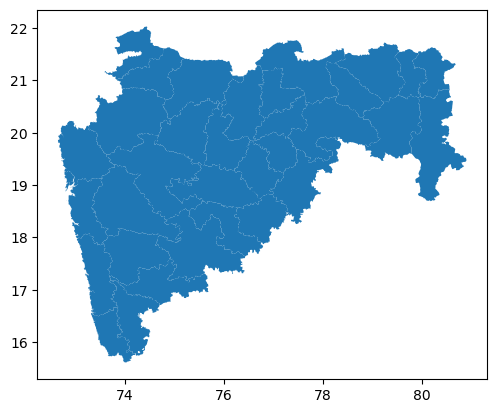

In [15]:
mh_gdf.plot()

In [16]:
mh_mig_df.head()

,pc11_state_id,pc11_district_id,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare
496,27,497,8185802.0,0.007063,0.001422,10900000.0,0.006427,0.000975,8185802,0.008969,0.001806,10900000,0.016199,0.002458
497,27,498,8185802.0,0.010199,0.002555,10900000.0,0.003109,0.000587,8185802,0.020634,0.005170,10900000,0.006169,0.001165
498,27,499,8185802.0,0.008154,0.004213,10900000.0,0.001707,0.000665,8185802,0.016472,0.008512,10900000,0.004088,0.001592
499,27,500,8185802.0,0.007337,0.002318,10900000.0,0.002344,0.000558,8185802,0.009724,0.003072,10900000,0.006478,0.001542
500,27,501,8185802.0,0.008464,0.001876,10900000.0,0.005348,0.000893,8185802,0.013356,0.002960,10900000,0.000732,0.000122


In [17]:
mh_pop_df.head()

,pc11_state_id,pc11_district_id,sector_present,pc11_pca_tot_u,pc11_pca_tot_r,pc11_pca_tot_t,age_0_r_share,age_5_r_share,age_10_r_share,age_15_r_share,...,age_75_t,age_75_t_share,age_80_r,age_80_u,age_80_t,age_80_t_share,age_85_r,age_85_u,age_85_t,age_85_t_share
495,27,497,3 urban and rural,275474,1372821,1648295,0.095016,0.115552,0.117124,0.107213,...,11042,0.006699,4232,1129,5361,0.003252,2420,665,3085,0.001872
496,27,498,3 urban and rural,571036,1479826,2050862,0.083506,0.105118,0.106695,0.096513,...,18935,0.009233,6410,2951,9361,0.004564,3461,1861,5322,0.002595
497,27,499,3 urban and rural,1342711,2887206,4229917,0.077212,0.093939,0.101009,0.097266,...,44346,0.010484,15133,7655,22788,0.005387,8565,4358,12923,0.003055
498,27,500,3 urban and rural,548860,2037398,2586258,0.071852,0.090889,0.100293,0.097752,...,28062,0.010850,13377,3276,16653,0.006439,7205,1785,8990,0.003476
499,27,501,3 urban and rural,719741,1094165,1813906,0.078777,0.084752,0.099345,0.099928,...,18094,0.009975,6181,4288,10469,0.005772,3252,2415,5667,0.003124


### Renaming column names

Changing Migration dataframes's column's names to match geo-spatial data frame column's names

| Old Variable Name | New variable name |
| ----------------- | ----------------- |
| pc11_state_id     | pc11_s_id	        |
| pc11_district_id  | pc11_d_id         |

In [18]:
mh_df_NewCol_names = {
    'pc11_state_id' : 'pc11_s_id', 
    'pc11_district_id' : 'pc11_d_id' 
}

mh_mig_df = mh_mig_df.rename(columns=mh_df_NewCol_names)
mh_pop_df = mh_pop_df.rename(columns=mh_df_NewCol_names)

In [19]:
mh_pop_df.head()

,pc11_s_id,pc11_d_id,sector_present,pc11_pca_tot_u,pc11_pca_tot_r,pc11_pca_tot_t,age_0_r_share,age_5_r_share,age_10_r_share,age_15_r_share,...,age_75_t,age_75_t_share,age_80_r,age_80_u,age_80_t,age_80_t_share,age_85_r,age_85_u,age_85_t,age_85_t_share
495,27,497,3 urban and rural,275474,1372821,1648295,0.095016,0.115552,0.117124,0.107213,...,11042,0.006699,4232,1129,5361,0.003252,2420,665,3085,0.001872
496,27,498,3 urban and rural,571036,1479826,2050862,0.083506,0.105118,0.106695,0.096513,...,18935,0.009233,6410,2951,9361,0.004564,3461,1861,5322,0.002595
497,27,499,3 urban and rural,1342711,2887206,4229917,0.077212,0.093939,0.101009,0.097266,...,44346,0.010484,15133,7655,22788,0.005387,8565,4358,12923,0.003055
498,27,500,3 urban and rural,548860,2037398,2586258,0.071852,0.090889,0.100293,0.097752,...,28062,0.010850,13377,3276,16653,0.006439,7205,1785,8990,0.003476
499,27,501,3 urban and rural,719741,1094165,1813906,0.078777,0.084752,0.099345,0.099928,...,18094,0.009975,6181,4288,10469,0.005772,3252,2415,5667,0.003124


## Data Merging

In [20]:
print(mh_mig_df.shape)
print(mh_pop_df.shape)
print(mh_gdf.shape)

(35, 14)
(35, 114)
(35, 4)


### data slicing

There are a lot of variables in population dataframe, but we will only need total population from it.  

In [21]:
useful_pop_columns = ['pc11_d_id', 'pc11_pca_tot_t']  # useful population columns
mh_pop_useful_df = mh_pop_df[useful_pop_columns]
mh_pop_useful_df.head()

,pc11_d_id,pc11_pca_tot_t
495,497,1648295
496,498,2050862
497,499,4229917
498,500,2586258
499,501,1813906


#### merging migration data

In [22]:
mh_gdf2 = mh_gdf.merge(mh_mig_df, on="pc11_d_id", how="left")

#### merging population data

In [23]:
mh_gdf2 = mh_gdf2.merge(mh_pop_useful_df, on="pc11_d_id", how="left")

In [24]:
mh_gdf2.head()

,pc11_s_id_x,pc11_d_id,d_name,geometry,pc11_s_id_y,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare,pc11_pca_tot_t
0,27,497,Nandurbar,"POLYGON ((74.43555 22.03100, 74.43945 22.02652...",27,8185802.0,0.007063,0.001422,10900000.0,0.006427,0.000975,8185802,0.008969,0.001806,10900000,0.016199,0.002458,1648295
1,27,498,Dhule,"POLYGON ((74.87001 21.63029, 74.87106 21.63024...",27,8185802.0,0.010199,0.002555,10900000.0,0.003109,0.000587,8185802,0.020634,0.005170,10900000,0.006169,0.001165,2050862
2,27,499,Jalgaon,"POLYGON ((75.24348 21.41494, 75.24768 21.41067...",27,8185802.0,0.008154,0.004213,10900000.0,0.001707,0.000665,8185802,0.016472,0.008512,10900000,0.004088,0.001592,4229917
3,27,500,Buldana,"POLYGON ((76.71231 21.28740, 76.71283 21.28734...",27,8185802.0,0.007337,0.002318,10900000.0,0.002344,0.000558,8185802,0.009724,0.003072,10900000,0.006478,0.001542,2586258
4,27,501,Akola,"POLYGON ((77.07892 21.21607, 77.08324 21.21416...",27,8185802.0,0.008464,0.001876,10900000.0,0.005348,0.000893,8185802,0.013356,0.002960,10900000,0.000732,0.000122,1813906


In [25]:
mh_gdf2 = mh_gdf2.drop('pc11_s_id_y', axis=1)

In [26]:
# changing column name
mh_gdf2 = mh_gdf2.rename(columns=
                         {'pc11_s_id_x' : 'pc11_s_id', }
                         )

In [27]:
mh_gdf2.columns

Index(['pc11_s_id', 'pc11_d_id', 'd_name', 'geometry', 'inltmigrantstotal',
       'inltmigrationrate', 'inltmigrationshare', 'instmigrantstotal',
       'instmigrationrate', 'instmigrationshare', 'outltmigrantstotal',
       'outltmigrationrate', 'outltmigrationshare', 'outstmigrantstotal',
       'outstmigrationrate', 'outstmigrationshare', 'pc11_pca_tot_t'],
      dtype='object')

### Missing data

In [28]:
mh_gdf2.dtypes

pc11_s_id                 int32
pc11_d_id                 int32
d_name                   object
geometry               geometry
inltmigrantstotal       float64
inltmigrationrate       float64
inltmigrationshare      float64
instmigrantstotal       float64
instmigrationrate       float64
instmigrationshare      float64
outltmigrantstotal        int64
outltmigrationrate      float64
outltmigrationshare     float64
outstmigrantstotal        int64
outstmigrationrate      float64
outstmigrationshare     float64
pc11_pca_tot_t            int64
dtype: object

In [29]:
mh_gdf2_missing_dict = missing_values(mh_gdf2)
mh_gdf2_missing_dict

{'pc11_s_id': 0,
 'pc11_d_id': 0,
 'd_name': 0,
 'geometry': 0,
 'inltmigrantstotal': 0,
 'inltmigrationrate': 0,
 'inltmigrationshare': 0,
 'instmigrantstotal': 0,
 'instmigrationrate': 0,
 'instmigrationshare': 0,
 'outltmigrantstotal': 0,
 'outltmigrationrate': 0,
 'outltmigrationshare': 0,
 'outstmigrantstotal': 0,
 'outstmigrationrate': 0,
 'outstmigrationshare': 0,
 'pc11_pca_tot_t': 0}

> **No Missing Values**

### EDA - Exploratory Data Analysis

#### Absolute Migration Numbers

The migration data has  
* **Migration Rate** which is Migration number / population in a district  
* **Migration Share** which is Migration number / total migrants in the country  

In [30]:
mh_gdf2.head()

,pc11_s_id,pc11_d_id,d_name,geometry,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,outltmigrantstotal,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare,pc11_pca_tot_t
0,27,497,Nandurbar,"POLYGON ((74.43555 22.03100, 74.43945 22.02652...",8185802.0,0.007063,0.001422,10900000.0,0.006427,0.000975,8185802,0.008969,0.001806,10900000,0.016199,0.002458,1648295
1,27,498,Dhule,"POLYGON ((74.87001 21.63029, 74.87106 21.63024...",8185802.0,0.010199,0.002555,10900000.0,0.003109,0.000587,8185802,0.020634,0.005170,10900000,0.006169,0.001165,2050862
2,27,499,Jalgaon,"POLYGON ((75.24348 21.41494, 75.24768 21.41067...",8185802.0,0.008154,0.004213,10900000.0,0.001707,0.000665,8185802,0.016472,0.008512,10900000,0.004088,0.001592,4229917
3,27,500,Buldana,"POLYGON ((76.71231 21.28740, 76.71283 21.28734...",8185802.0,0.007337,0.002318,10900000.0,0.002344,0.000558,8185802,0.009724,0.003072,10900000,0.006478,0.001542,2586258
4,27,501,Akola,"POLYGON ((77.07892 21.21607, 77.08324 21.21416...",8185802.0,0.008464,0.001876,10900000.0,0.005348,0.000893,8185802,0.013356,0.002960,10900000,0.000732,0.000122,1813906


In [ ]:
##  DO NOT RUN THIS 

# inltmigrants = in long-term migrants in a district
# mh_gdf2['inltmigrants'] = mh_gdf2['inltmigrationshare'] * mh_gdf2['inltmigrantstotal']

# # instmigrants = in short-term migrants in a district
# mh_gdf2['instmigrants'] = mh_gdf2['instmigrationshare'] * mh_gdf2['instmigrantstotal']

# # outltmigrants = out long-term migrants in a district
# mh_gdf2['outltmigrants'] = mh_gdf2['outltmigrationshare'] * mh_gdf2['outltmigrantstotal']  

# # outstmigrants = out short-term migrants in a district
# mh_gdf2['outstmigrants'] = mh_gdf2['outstmigrationshare'] * mh_gdf2['outstmigrantstotal']

### Net Out Migration  

> = **(Out migration - In migration) rate**  
> = rate *x* dist population = **migrants count**  

#### Migration Rate

In [31]:
# Net Out Short-term Migration Rate = (Out ST - In ST) migration rate
mh_gdf2['NetOut_stmigrationrate'] = mh_gdf2['outstmigrationrate'] - mh_gdf2['instmigrationrate']  

# Net Out Long-term Migration Rate = (Out LT - In LT) migration rate
mh_gdf2['NetOut_ltmigrationrate'] = mh_gdf2['outltmigrationrate'] - mh_gdf2['inltmigrationrate']

#### Migration Count

In [32]:
# Net Out Short-term Migration Count = Net Out ST Rate X Dist Population  
mh_gdf2['NetOut_stmigration_Count'] = mh_gdf2['NetOut_stmigrationrate'] * mh_gdf2['pc11_pca_tot_t']

# Net Out Long-term Migration Count = Net Out LT Rate X Dist Population
mh_gdf2['NetOut_ltmigration_Count'] = mh_gdf2['NetOut_ltmigrationrate'] * mh_gdf2['pc11_pca_tot_t']

In [33]:
mh_gdf2.head()

,pc11_s_id,pc11_d_id,d_name,geometry,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,...,outltmigrationrate,outltmigrationshare,outstmigrantstotal,outstmigrationrate,outstmigrationshare,pc11_pca_tot_t,NetOut_stmigrationrate,NetOut_ltmigrationrate,NetOut_stmigration_Count,NetOut_ltmigration_Count
0,27,497,Nandurbar,"POLYGON ((74.43555 22.03100, 74.43945 22.02652...",8185802.0,0.007063,0.001422,10900000.0,0.006427,0.000975,...,0.008969,0.001806,10900000,0.016199,0.002458,1648295,0.009773,0.001906,16108.129036,3140.826123
1,27,498,Dhule,"POLYGON ((74.87001 21.63029, 74.87106 21.63024...",8185802.0,0.010199,0.002555,10900000.0,0.003109,0.000587,...,0.020634,0.005170,10900000,0.006169,0.001165,2050862,0.003060,0.010435,6276.458270,21401.362279
2,27,499,Jalgaon,"POLYGON ((75.24348 21.41494, 75.24768 21.41067...",8185802.0,0.008154,0.004213,10900000.0,0.001707,0.000665,...,0.016472,0.008512,10900000,0.004088,0.001592,4229917,0.002381,0.008319,10071.854946,35187.830579
3,27,500,Buldana,"POLYGON ((76.71231 21.28740, 76.71283 21.28734...",8185802.0,0.007337,0.002318,10900000.0,0.002344,0.000558,...,0.009724,0.003072,10900000,0.006478,0.001542,2586258,0.004134,0.002386,10692.625334,6172.103941
4,27,501,Akola,"POLYGON ((77.07892 21.21607, 77.08324 21.21416...",8185802.0,0.008464,0.001876,10900000.0,0.005348,0.000893,...,0.013356,0.002960,10900000,0.000732,0.000122,1813906,-0.004616,0.004892,-8372.990495,8874.172687


## Histogram & Maps

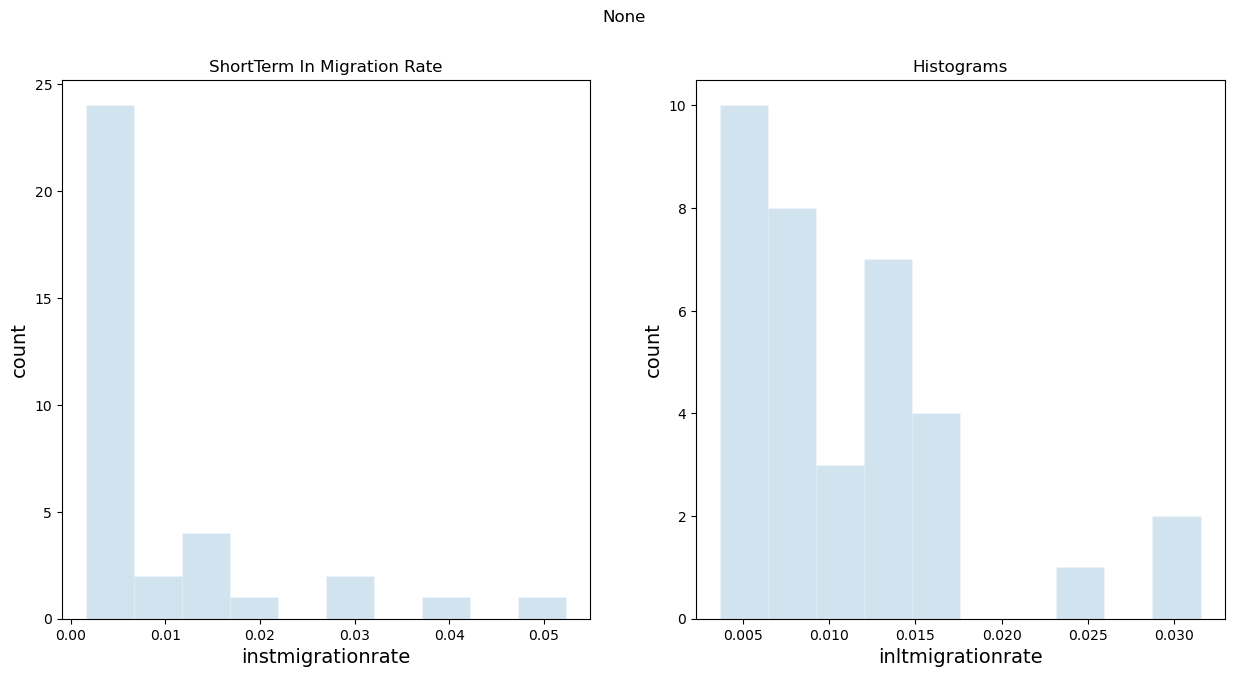

In [35]:
two_histograms(mh_gdf2, var1='instmigrationrate', var2='inltmigrationrate', num_bins=10, 
               title1="ShortTerm In Migration Rate", title2="LongTerm In Migration Rate")

#### Short-term

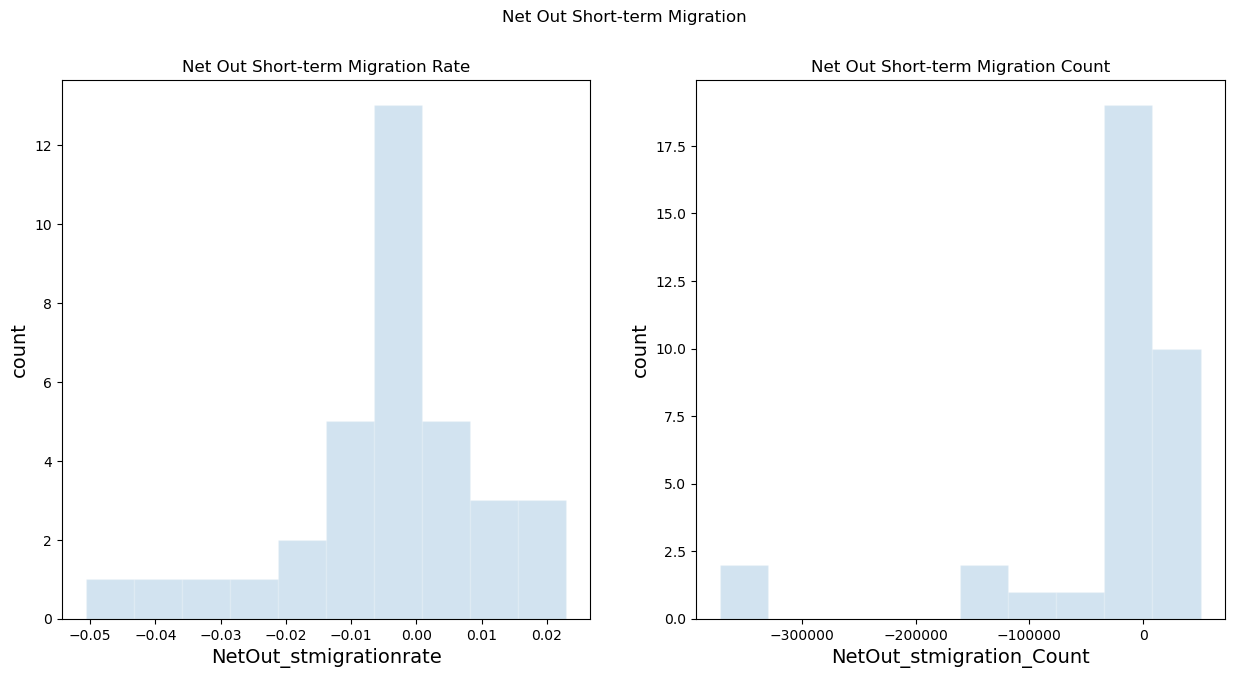

In [36]:
two_histograms(mh_gdf2, var1='NetOut_stmigrationrate', var2='NetOut_stmigration_Count', num_bins=10, 
               title1="Net Out Short-term Migration Rate", title2="Net Out Short-term Migration Count", title="Net Out Short-term Migration")

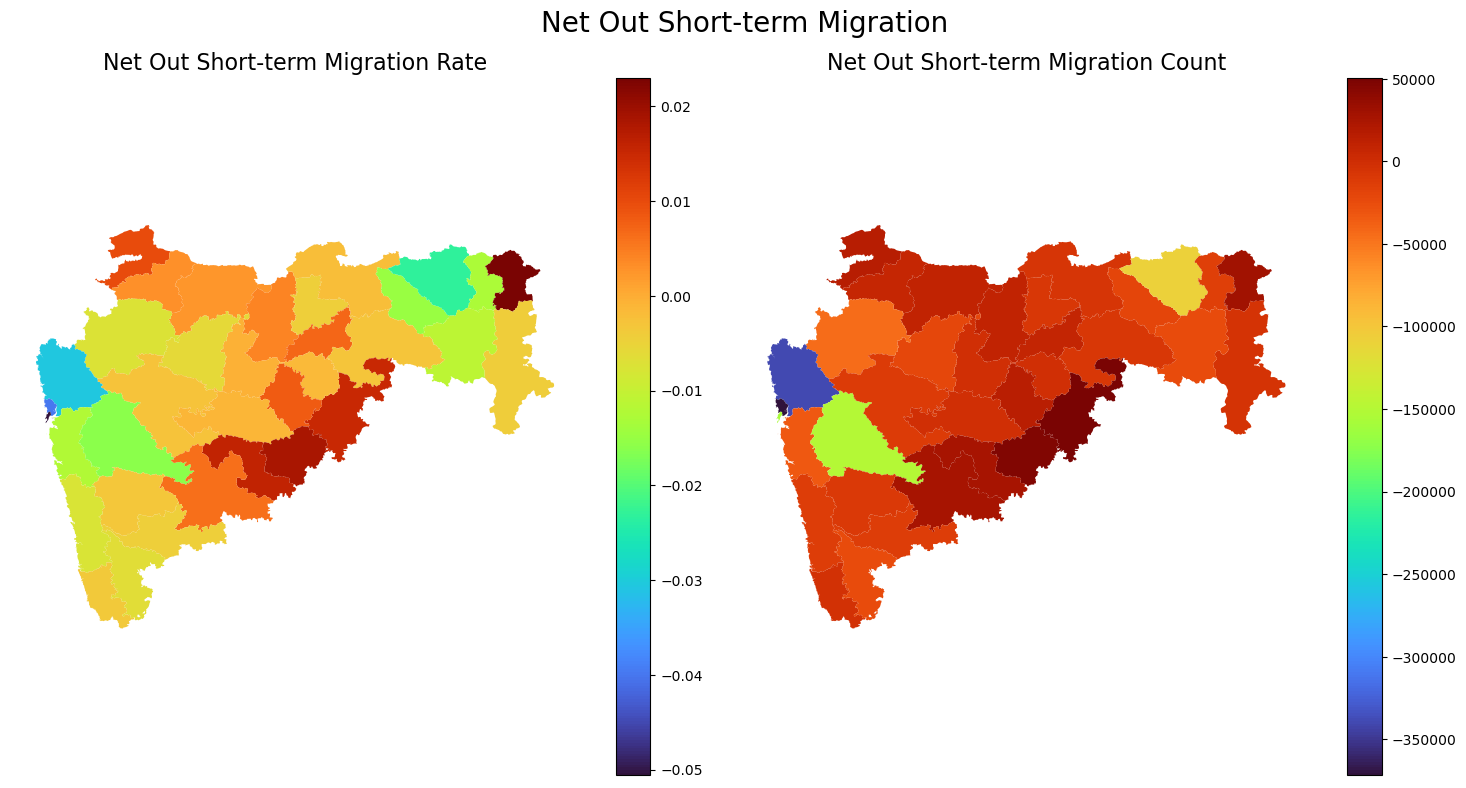

In [38]:
two_maps(mh_gdf2, var1="NetOut_stmigrationrate", var2="NetOut_stmigration_Count", 
         title1="Net Out Short-term Migration Rate", title2="Net Out Short-term Migration Count", 
         title="Net Out Short-term Migration")

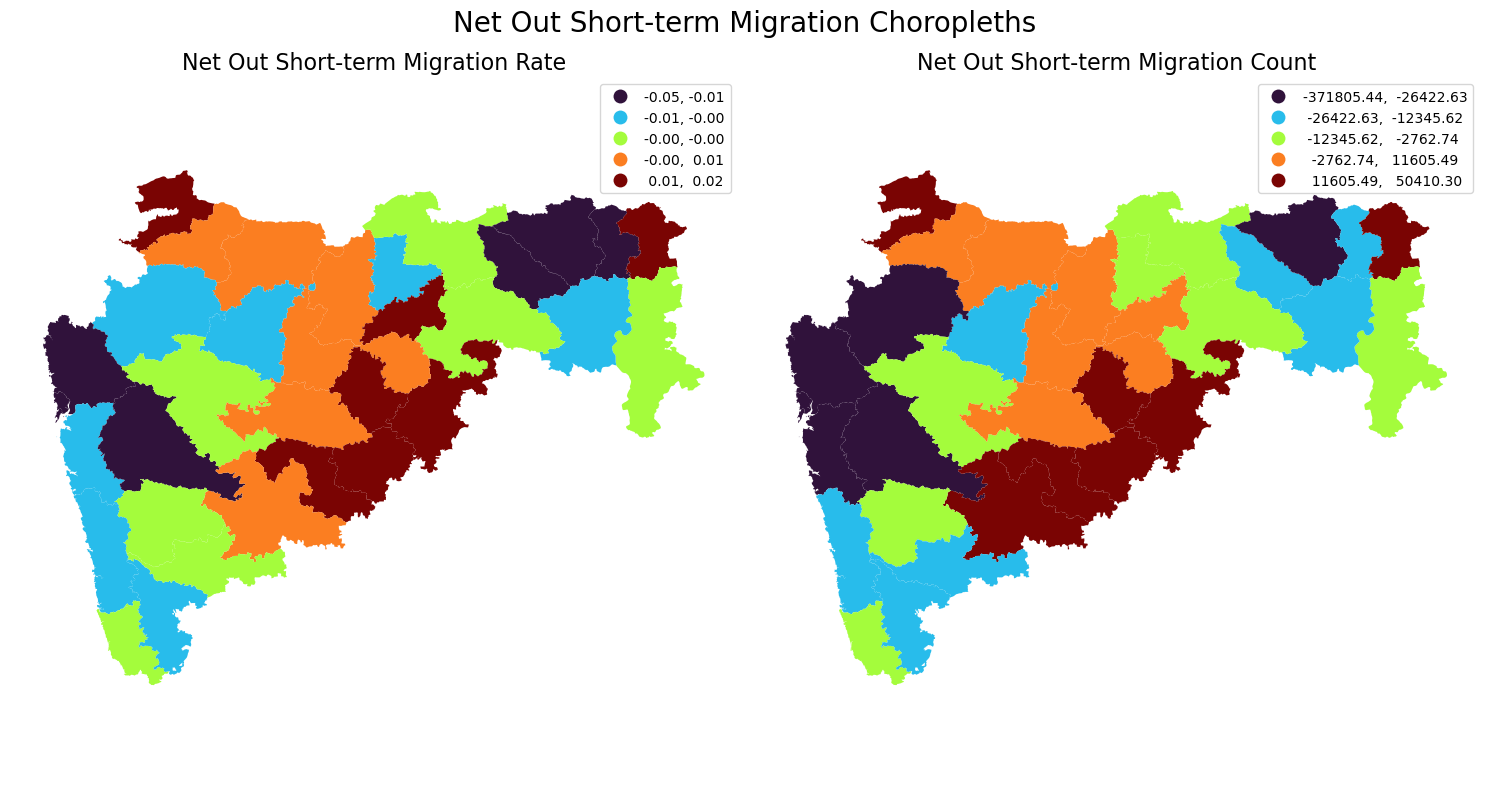

In [81]:
two_maps_choropleths(mh_gdf2, var1="NetOut_stmigrationrate", var2="NetOut_stmigration_Count", 
         title1="Net Out Short-term Migration Rate", title2="Net Out Short-term Migration Count", 
         title="Net Out Short-term Migration Choropleths")

> A clear pattern of immigration in and around cities can be seen.

<Axes: >

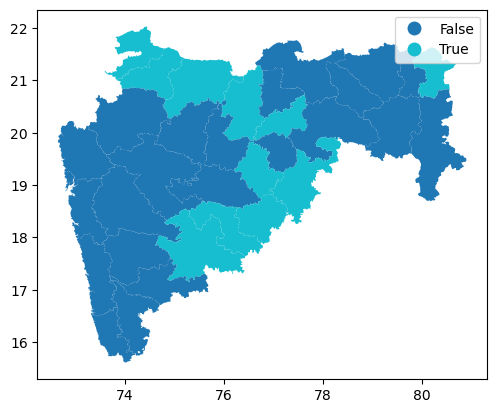

In [39]:
mh_gdf2.plot(column=mh_gdf2['NetOut_stmigrationrate'] > 0, legend=True, categorical=True)

#### Long-term

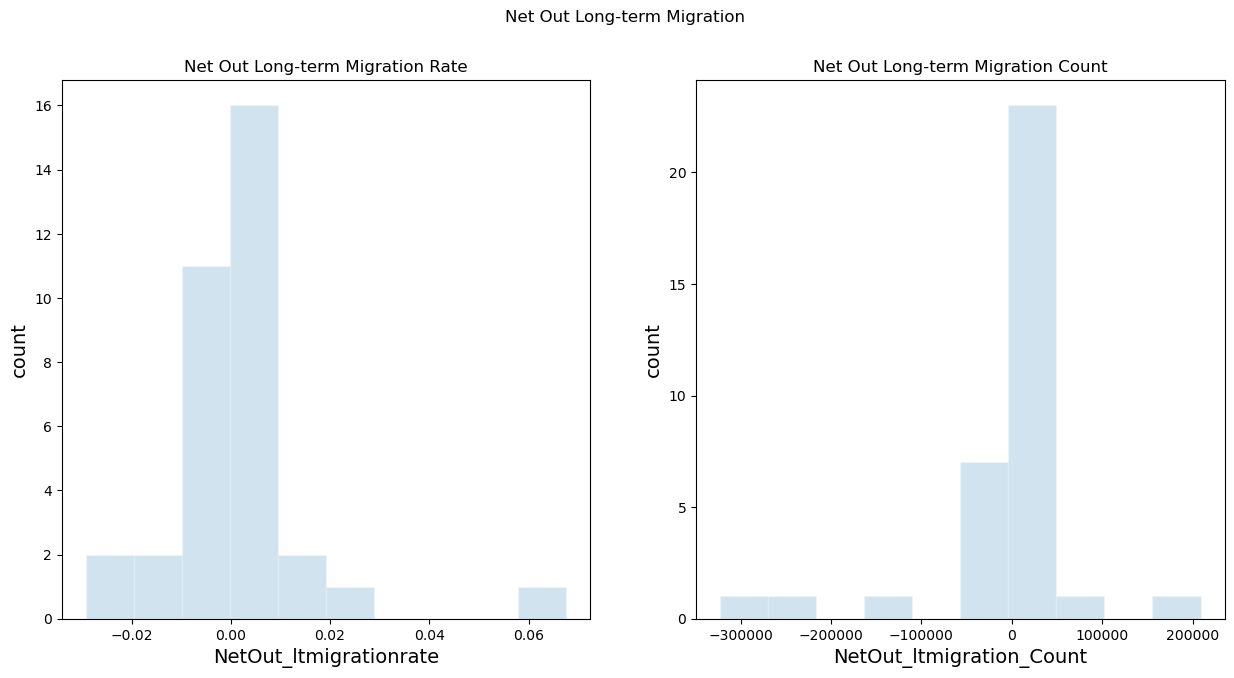

In [41]:
two_histograms(mh_gdf2, var1='NetOut_ltmigrationrate', var2='NetOut_ltmigration_Count', num_bins=10, 
               title1="Net Out Long-term Migration Rate", title2="Net Out Long-term Migration Count", title="Net Out Long-term Migration")

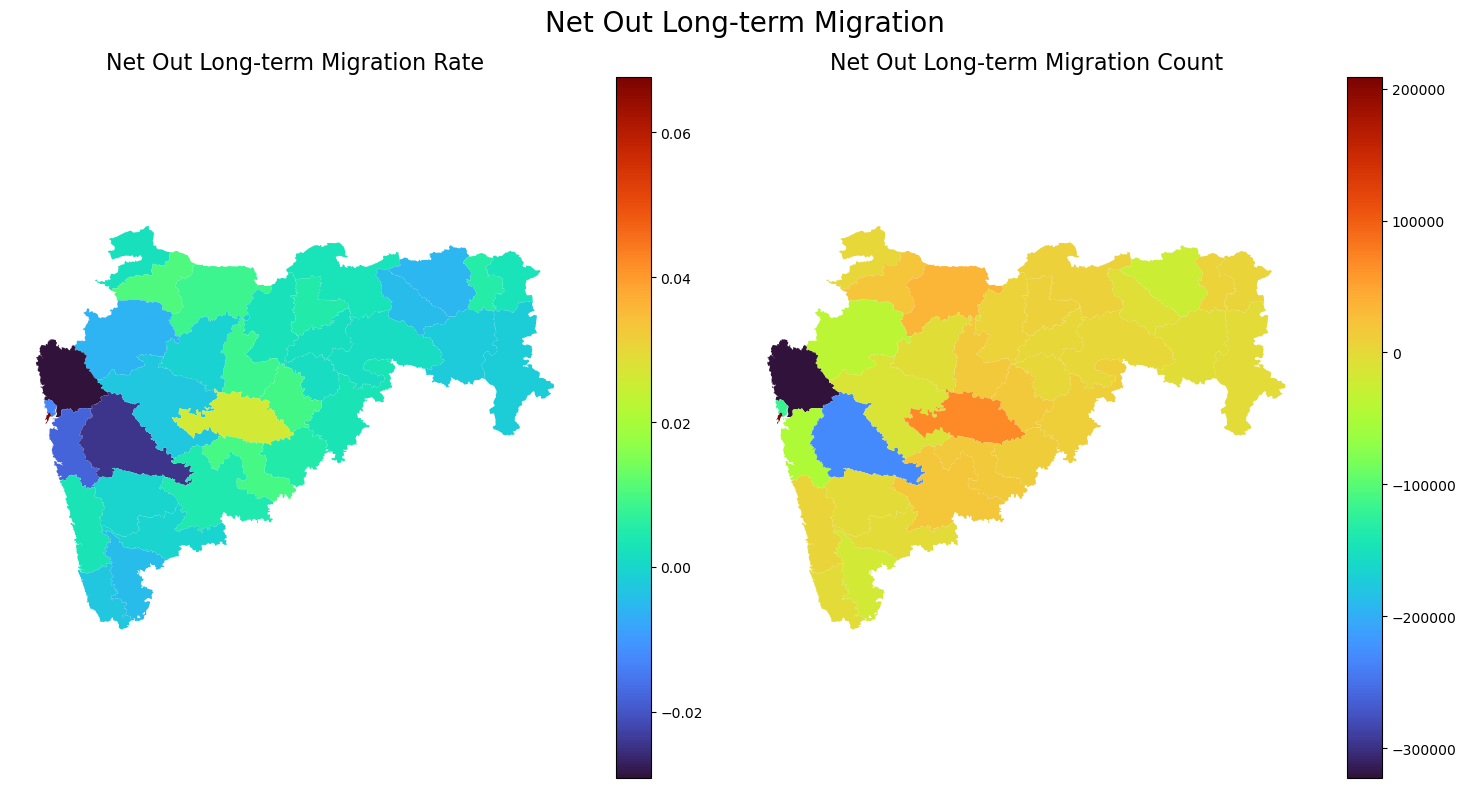

In [40]:
two_maps(mh_gdf2, var1="NetOut_ltmigrationrate", var2="NetOut_ltmigration_Count", 
         title1="Net Out Long-term Migration Rate", title2="Net Out Long-term Migration Count", 
         title="Net Out Long-term Migration")

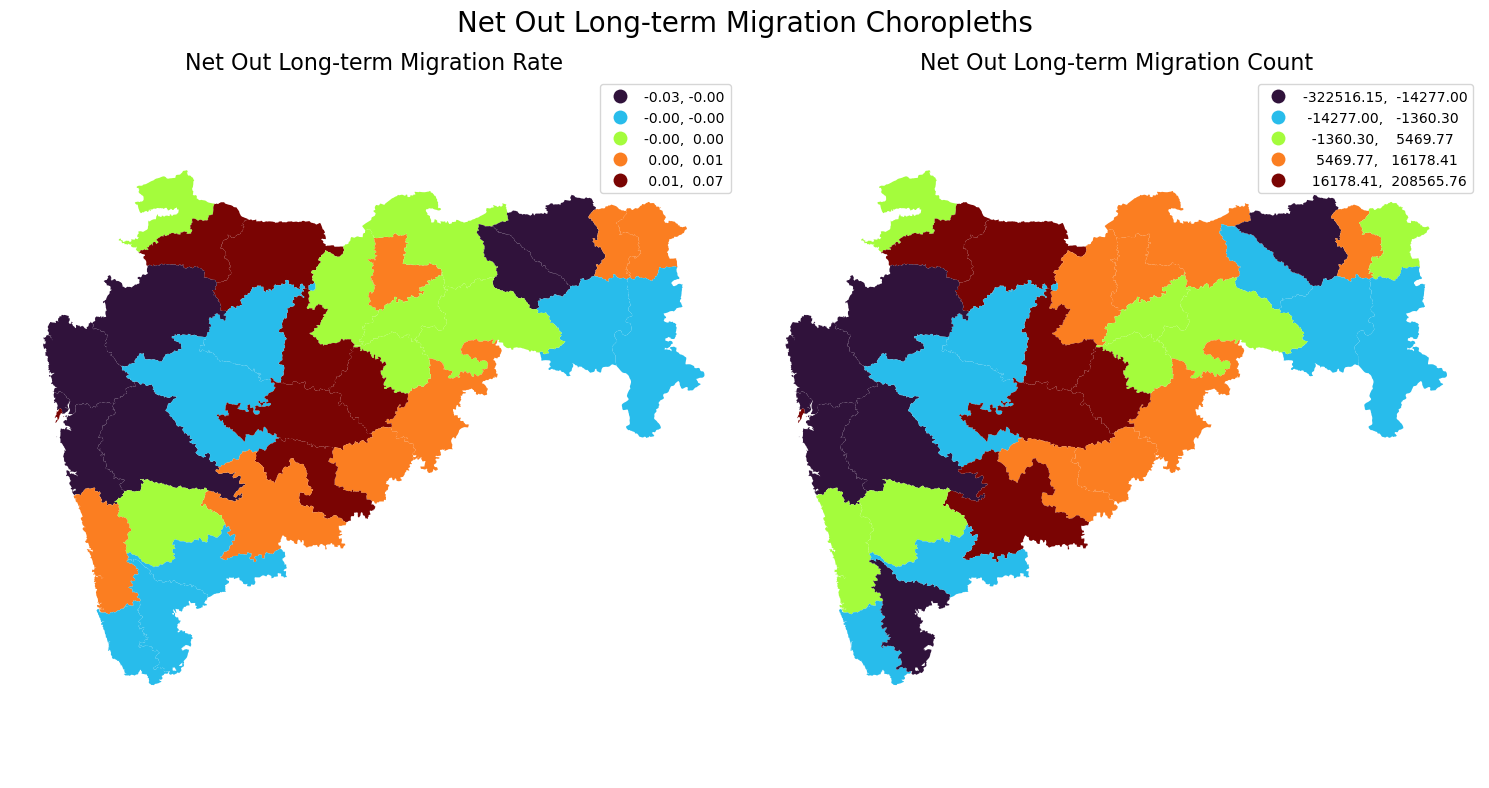

In [83]:
two_maps_choropleths(mh_gdf2, var1="NetOut_ltmigrationrate", var2="NetOut_ltmigration_Count", 
         title1="Net Out Long-term Migration Rate", title2="Net Out Long-term Migration Count", 
         title="Net Out Long-term Migration Choropleths")

> Same as in short-term migration, even with long-term migration a clear pattern of in migration is seen in and around the cities of both Mumbai and Nagpur.

<Axes: >

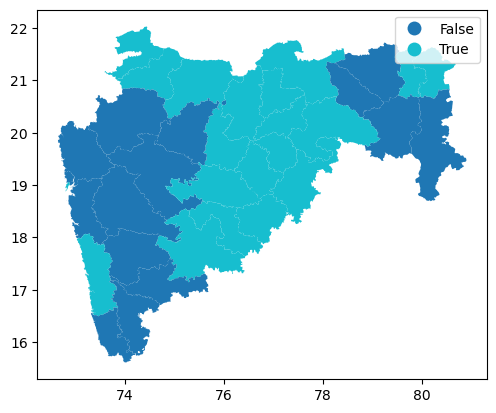

In [42]:
mh_gdf2.plot(column=mh_gdf2['NetOut_ltmigrationrate'] > 0, legend=True, categorical=True)

In [ ]:
# two_maps(mh_gdf2, var1="inltmigrationrate", var2="outltmigrationrate", 
        #  title1="LongTerm In Migration Rate", title2="LongTerm Out Migration Rate", 
        #  title="LongTerm Migration")

# Spatial Weights

## Queen - lab4 part1

In [102]:
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import seaborn as sns
from pysal.explore import esda

c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\quantecon\lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):
c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\spaghetti\network.py:40: FutureWarning: The next major rel

> Queen

In [44]:
w_queen = weights.Queen.from_dataframe(mh_gdf2, ids="pc11_d_id")
w_queen

c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There is 1 island with id: 528.
  warnings.warn(message)


In [46]:
# testing the neighbours weight
w_queen[498]  

{497: 1.0, 499: 1.0, 516: 1.0}

In [47]:
# neighbours of 498
w_queen.neighbors[498]

[497, 499, 516]

> Cardinalities

In [48]:
queen_card = pd.Series(w_queen.cardinalities)
queen_card.head()

497    1
498    3
499    4
500    7
501    3
dtype: int64

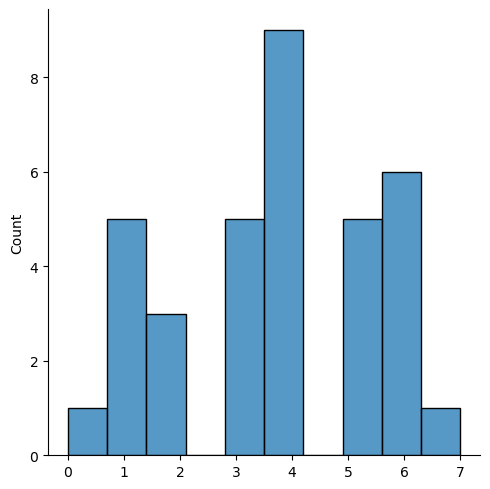

In [50]:
sns.displot(queen_card, bins=10)

In [54]:
# Number of observations
w_queen.n

35

In [55]:
# Average number of neighbors
w_queen.mean_neighbors

3.7142857142857144

In [56]:
# Min number of neighbors
w_queen.min_neighbors

0

In [57]:
# Max number of neighbors
w_queen.max_neighbors

7

In [85]:
# Islands (observations disconnected)
w_queen.islands

[528]

In [86]:
# Islands
mh_gdf2[mh_gdf2['pc11_d_id'].isin(w_queen.islands)]

,pc11_s_id,pc11_d_id,d_name,geometry,inltmigrantstotal,inltmigrationrate,inltmigrationshare,instmigrantstotal,instmigrationrate,instmigrationshare,...,outstmigrationshare,pc11_pca_tot_t,NetOut_stmigrationrate,NetOut_ltmigrationrate,NetOut_stmigration_Count,NetOut_ltmigration_Count,SL_NetOut_stmigrationrate,SL_NetOut_stmigration_Count,SL_NetOut_ltmigrationrate,SL_NetOut_ltmigration_Count
31,27,528,Ratnagiri,"MULTIPOLYGON (((73.68811 16.58394, 73.68803 16...",8185802.0,0.012498,0.002466,10900000.0,0.00777,0.001155,...,0.0,1615069,-0.00777,0.003097,-12548.762793,5001.545679,0.0,0.0,0.0,0.0


In [90]:
mh_gdf2[mh_gdf2['pc11_d_id'].isin(w_queen.islands)].index

Index([31], dtype='int64')

#### Island

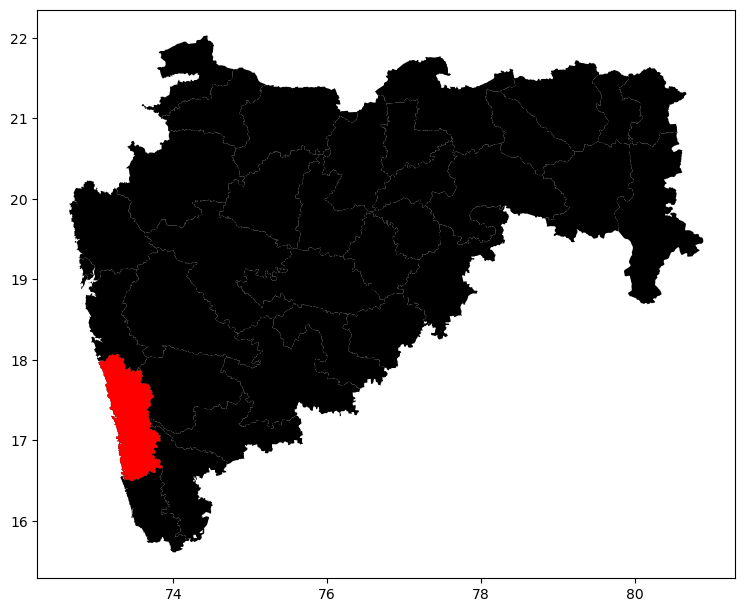

In [88]:
ax = mh_gdf2.plot(color='k', figsize=(9, 9))
# mh_gdf2.loc[w_queen.islands, :].plot(color='red', ax=ax);
mh_gdf2[mh_gdf2['pc11_d_id'].isin(w_queen.islands)].plot(color='red', ax=ax);

 > We need to remove this island, otherwise it will start effecting weights of its surrounds

In [91]:
mh_gdf2 = mh_gdf2.drop(mh_gdf2[mh_gdf2['pc11_d_id'].isin(w_queen.islands)].index)

<Axes: >

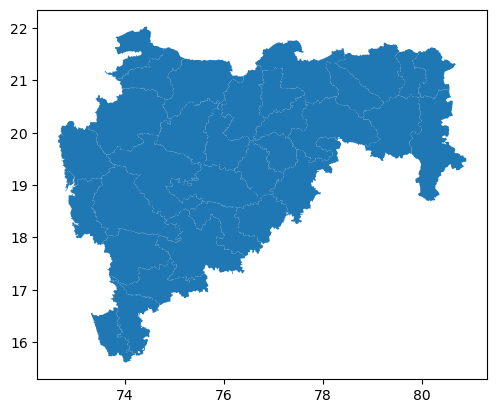

In [92]:
mh_gdf2.plot()

> **The island is gone**

In [93]:
# weights are calculated again to take away the influence of island
w_queen = weights.Queen.from_dataframe(mh_gdf2, ids="pc11_d_id")

c:\Users\Sharath Chandra\anaconda3\envs\gds\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [94]:
w_queen.islands

[]

In [63]:
w_queen.transform

'O'

## Spatial Lag

In [95]:
# Row-standardize the queen matrix
w_queen.transform = 'R'
# Compute spatial lag of `imd_score`
w_queen_score = weights.lag_spatial(w_queen, mh_gdf2['pc11_d_id'])
# Print the first five elements
w_queen_score[:5]

array([498.        , 504.        , 506.75      , 506.57142857,
       501.66666667])

Calculating Spatial Lag for 4 variables  
* **NetOut_stmigrationrate**, Net Out Short-term migration rate  
* **NetOut_stmigration_Count**, Net Out Short-term migration count  
* **NetOut_ltmigrationrate**, Net Out Long-term migration rate  
* **NetOut_ltmigration_Count**, Net Out Long-term migration count  

In [96]:
w_queen_score_NetOut_stmigrationrate = weights.lag_spatial(w_queen, mh_gdf2['NetOut_stmigrationrate'])
w_queen_score_NetOut_stmigration_Count = weights.lag_spatial(w_queen, mh_gdf2['NetOut_stmigration_Count'])
w_queen_score_NetOut_ltmigrationrate = weights.lag_spatial(w_queen, mh_gdf2['NetOut_ltmigrationrate'])
w_queen_score_NetOut_ltmigration_Count = weights.lag_spatial(w_queen, mh_gdf2['NetOut_ltmigration_Count'])

In [97]:
mh_gdf2['SL_NetOut_stmigrationrate'] = w_queen_score_NetOut_stmigrationrate
mh_gdf2['SL_NetOut_stmigration_Count'] = w_queen_score_NetOut_stmigration_Count
mh_gdf2['SL_NetOut_ltmigrationrate'] = w_queen_score_NetOut_ltmigrationrate
mh_gdf2['SL_NetOut_ltmigration_Count'] = w_queen_score_NetOut_ltmigration_Count

## Moran Plot

Explains Spatial Autocorrelation. Scatter plot with its own spatial lag

> We will have four morans plots

### Short-term morans plots

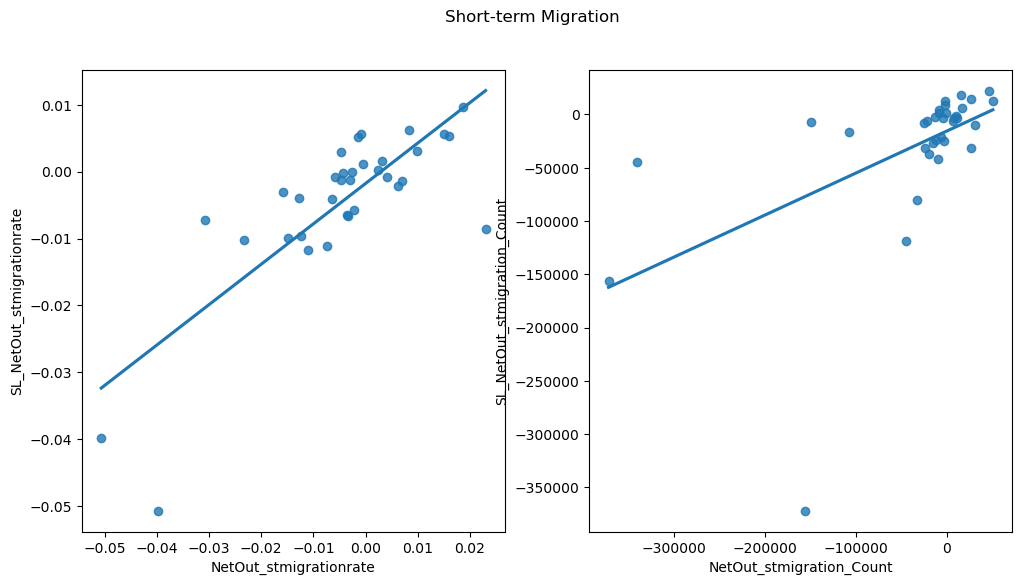

In [98]:
# Rate and count
# Setup the figure and axis
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot values
sns.regplot(x="NetOut_stmigrationrate", y="SL_NetOut_stmigrationrate", data=mh_gdf2, ci=None, ax=ax[0])
sns.regplot(x="NetOut_stmigration_Count", y="SL_NetOut_stmigration_Count", data=mh_gdf2, ci=None, ax=ax[1])
# Display
f.suptitle("Short-term Migration")
plt.show()

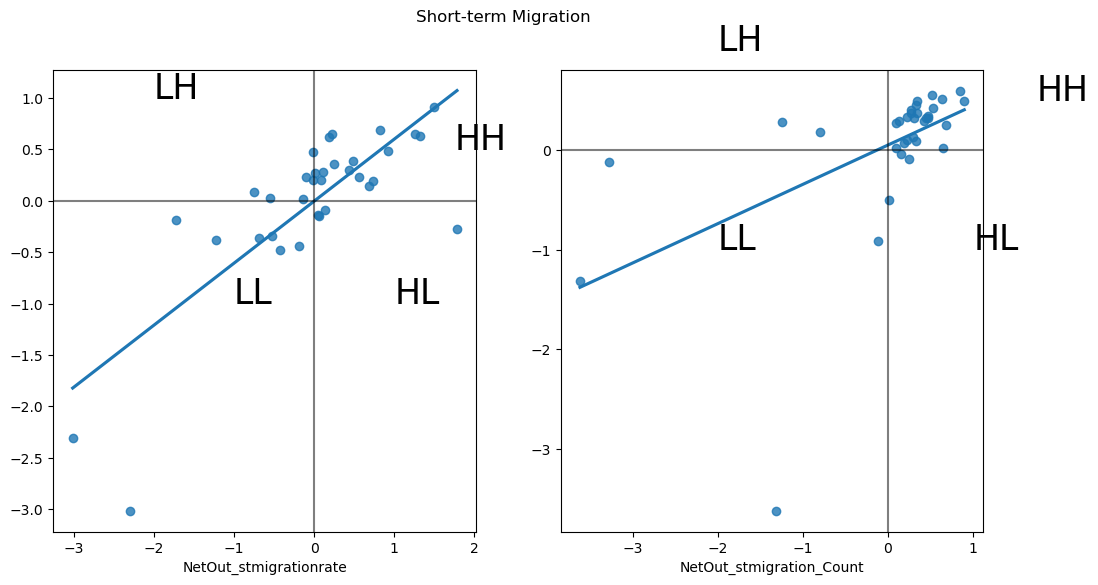

In [119]:
# Standardize => NetOut_stmigrationrate
std_NetOut_stmigrationrate = (mh_gdf2['NetOut_stmigrationrate'] - mh_gdf2['NetOut_stmigrationrate'].mean()) / mh_gdf2['NetOut_stmigrationrate'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_NetOut_stmigrationrate = pd.Series(weights.lag_spatial(w_queen, std_NetOut_stmigrationrate), index=std_NetOut_stmigrationrate.index)

# Standardize => NetOut_stmigration_Count
std_NetOut_stmigration_Count = (mh_gdf2['NetOut_stmigration_Count'] - mh_gdf2['NetOut_stmigration_Count'].mean()) / mh_gdf2['NetOut_stmigration_Count'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_NetOut_stmigration_Count = pd.Series(weights.lag_spatial(w_queen, std_NetOut_stmigration_Count), index=std_NetOut_stmigration_Count.index)


# Rate and count
# Setup the figure and axis
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot values
sns.regplot(x=std_NetOut_stmigrationrate, y=std_w_NetOut_stmigrationrate, ci=None, ax=ax[0])
sns.regplot(x=std_NetOut_stmigration_Count, y=std_w_NetOut_stmigration_Count, ci=None, ax=ax[1])
# Display

ax[0].axvline(0, c='k', alpha=0.5)
ax[1].axvline(0, c='k', alpha=0.5)
ax[0].axhline(0, c='k', alpha=0.5)
ax[1].axhline(0, c='k', alpha=0.5)

ax[0].text(1.75, 0.5, "HH", fontsize=25)
ax[0].text(1, -1, "HL", fontsize=25)
ax[0].text(-2, 1, "LH", fontsize=25)
ax[0].text(-1, -1, "LL", fontsize=25)

ax[1].text(1.75, 0.5, "HH", fontsize=25)
ax[1].text(1, -1, "HL", fontsize=25)
ax[1].text(-2, 1, "LH", fontsize=25)
ax[1].text(-2, -1, "LL", fontsize=25)


f.suptitle("Short-term Migration")
plt.show()

### Global Spatial Autocorrelation
> Positive autocorrelation can be observed in short-term migration 
   
> meaning, **districts that are close together show similar patterns of short-term migration**  

> **Moran's I**

In [104]:
# Moran's Index on Net Out Short term migration RATE
mi_NetOut_stmigrationrate = esda.Moran(mh_gdf2['NetOut_stmigrationrate'], w_queen)
print(mi_NetOut_stmigrationrate.I)

0.6034110066923984


In [105]:
mi_NetOut_stmigrationrate.p_sim

0.001

### LISA

In [120]:
lisa = esda.Moran_Local(mh_gdf2['NetOut_stmigrationrate'], w_queen)

**A good degree of clustering can be expected**

This low value of p_sim says that the short-term migration is highly spatially correlated

### Long-term moran plots

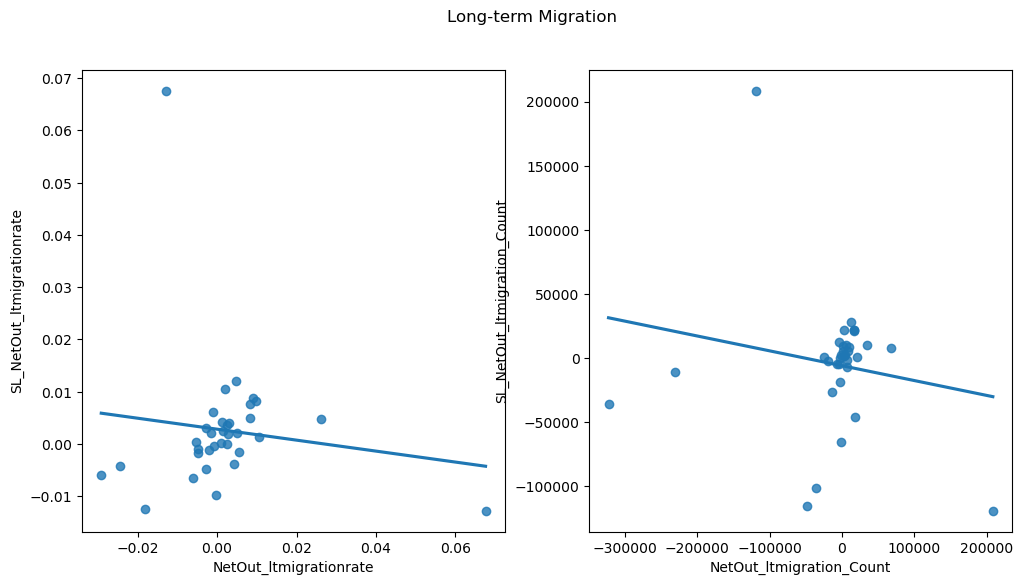

In [100]:
# Rate and count
# Setup the figure and axis
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot values
sns.regplot(x="NetOut_ltmigrationrate", y="SL_NetOut_ltmigrationrate", data=mh_gdf2, ci=None, ax=ax[0])
sns.regplot(x="NetOut_ltmigration_Count", y="SL_NetOut_ltmigration_Count", data=mh_gdf2, ci=None, ax=ax[1])
# Display
f.suptitle("Long-term Migration")
plt.show()

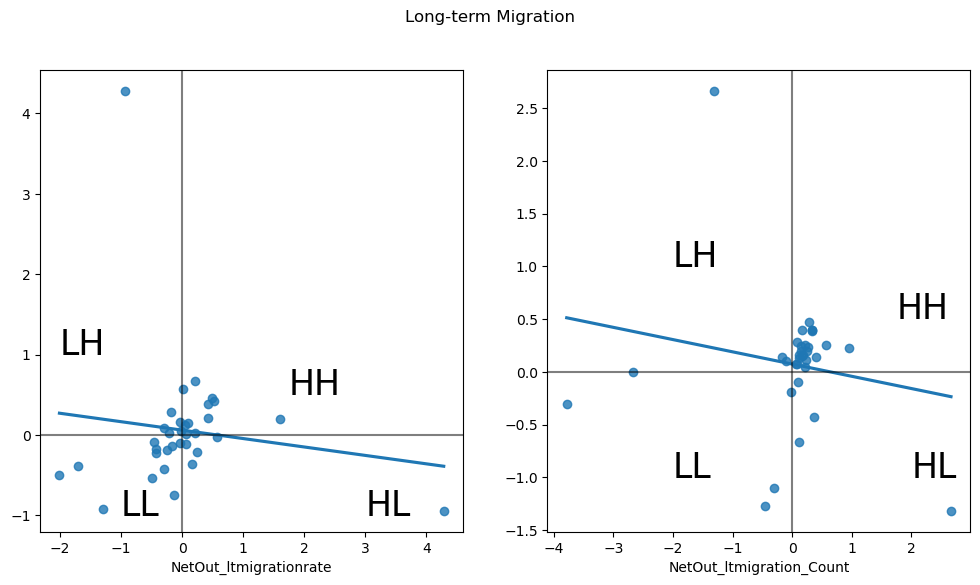

In [115]:
# Standardize => NetOut_ltmigrationrate
std_NetOut_ltmigrationrate = (mh_gdf2['NetOut_ltmigrationrate'] - mh_gdf2['NetOut_ltmigrationrate'].mean()) / mh_gdf2['NetOut_ltmigrationrate'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_NetOut_ltmigrationrate = pd.Series(weights.lag_spatial(w_queen, std_NetOut_ltmigrationrate), index=std_NetOut_ltmigrationrate.index)

# Standardize => NetOut_ltmigration_Count
std_NetOut_ltmigration_Count = (mh_gdf2['NetOut_ltmigration_Count'] - mh_gdf2['NetOut_ltmigration_Count'].mean()) / mh_gdf2['NetOut_ltmigration_Count'].std()
# Compute the spatial lag of the standardized version and save is as a 
# Series indexed as the original variable
std_w_NetOut_ltmigration_Count = pd.Series(weights.lag_spatial(w_queen, std_NetOut_ltmigration_Count), index=std_NetOut_ltmigration_Count.index)


# Rate and count
# Setup the figure and axis
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plot values
sns.regplot(x=std_NetOut_ltmigrationrate, y=std_w_NetOut_ltmigrationrate, ci=None, ax=ax[0])
sns.regplot(x=std_NetOut_ltmigration_Count, y=std_w_NetOut_ltmigration_Count, ci=None, ax=ax[1])
# Display
ax[0].axvline(0, c='k', alpha=0.5)
ax[1].axvline(0, c='k', alpha=0.5)
ax[0].axhline(0, c='k', alpha=0.5)
ax[1].axhline(0, c='k', alpha=0.5)

ax[0].text(1.75, 0.5, "HH", fontsize=25)
ax[0].text(3, -1, "HL", fontsize=25)
ax[0].text(-2, 1, "LH", fontsize=25)
ax[0].text(-1, -1, "LL", fontsize=25)

ax[1].text(1.75, 0.5, "HH", fontsize=25)
ax[1].text(2, -1, "HL", fontsize=25)
ax[1].text(-2, 1, "LH", fontsize=25)
ax[1].text(-2, -1, "LL", fontsize=25)



f.suptitle("Long-term Migration")
plt.show()

> Negative autocorrelation for long-term migration 

In [106]:
# Moran's Index on Net Out Long term migration RATE
mi_NetOut_ltmigrationrate = esda.Moran(mh_gdf2['NetOut_ltmigrationrate'], w_queen)
print(mi_NetOut_ltmigrationrate.I)

-0.10486586461552566


In [107]:
mi_NetOut_ltmigrationrate.p_sim

0.236

High value of p_sim suggests that long term migration is not well spatially correlated  
**A good degree of clustering cannot be expected**